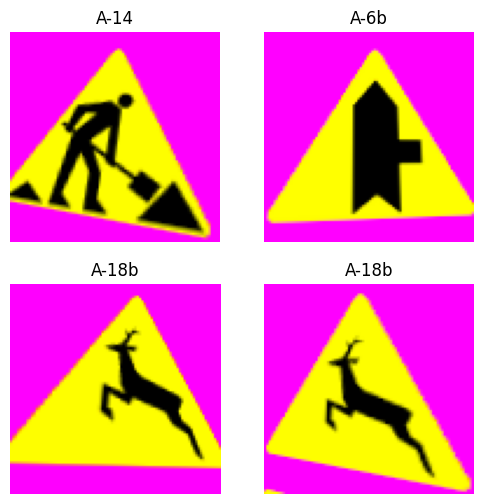

In [9]:
from fastai.data.transforms import get_image_files

from fastai.vision.data import ImageDataLoaders
from fastai.vision.augment import Resize
from fastai.vision.augment import aug_transforms

import re

signsDataSetDir = 'nn-dataset/preprocessed/warn'
learner_output_dir = '.'
znakiFiles = get_image_files(signsDataSetDir)

labels_pattern = r'([A-Z]-\d+[a-z]?)_(\d+).\w+'
rgxp = re.compile(labels_pattern)
rgxp.match(znakiFiles[0].name)

dls = ImageDataLoaders.from_name_re(learner_output_dir, znakiFiles, labels_pattern, bs=4, batch_tfms=aug_transforms(do_flip=False))
dls.show_batch()

C:\Users\student\Documents\repos\road-sign-checker\ai\sign-classificators\venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\student\Documents\repos\road-sign-checker\ai\sign-classificators\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=0.0030199517495930195)

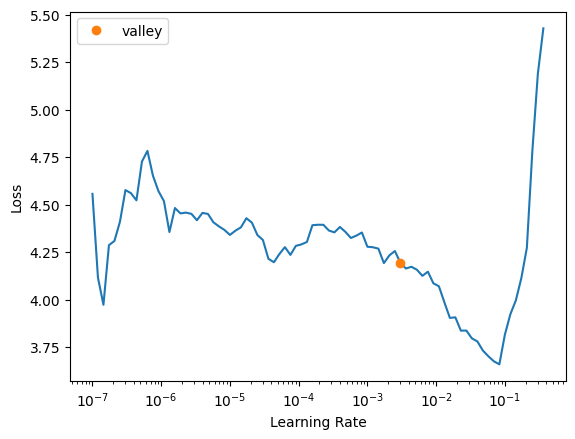

In [10]:
from fastai.vision.all import *
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.lr_find()

In [14]:
epochs = 10
learn.fine_tune(epochs)

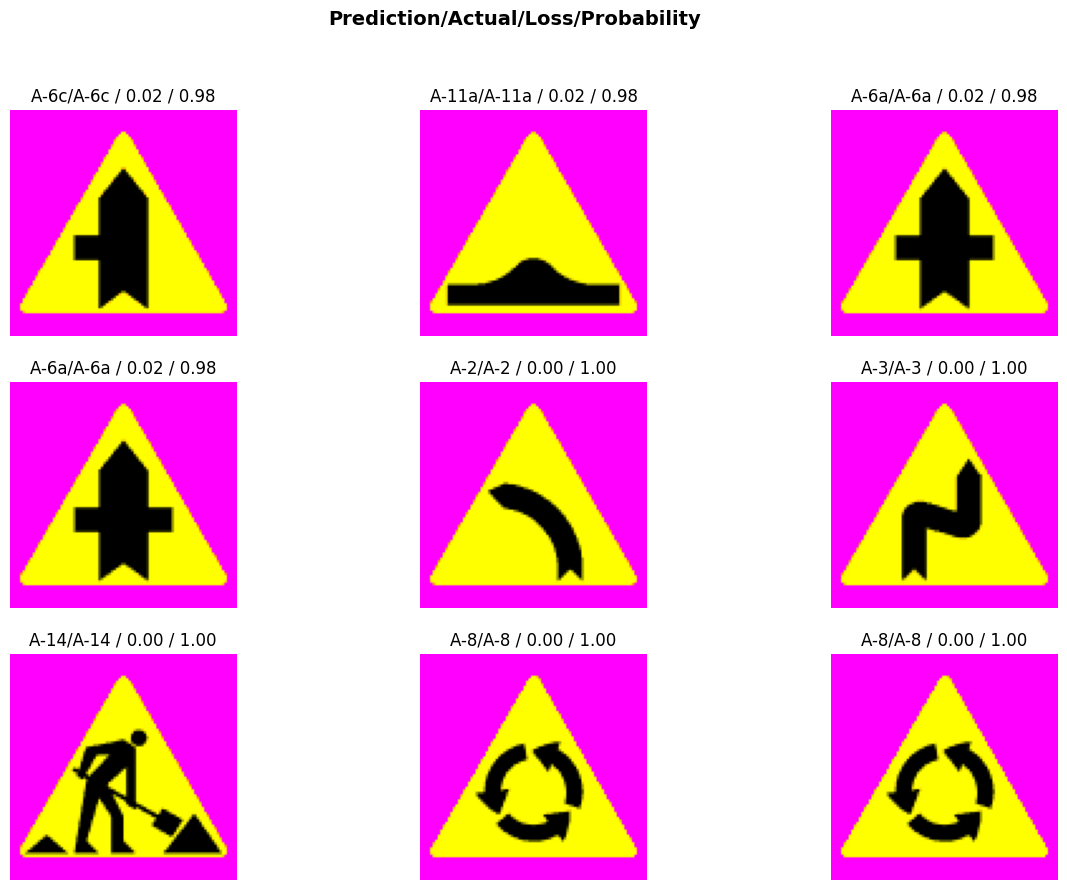

In [15]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,10))

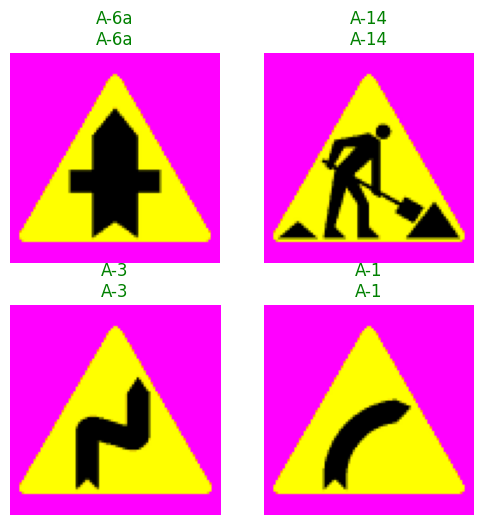

In [19]:
learn.show_results()

In [20]:
learn.export()